# 4주차 실습문제: 조건에 따른 열 추가 & 데이터 시각화

***

In [2]:
# 아래와 같이 필요한 라이브러리를 임포트 합니다.
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# 한글 폰트 설정 (맑은고딕)
plt.rc('font', family='Malgun Gothic') # For Windows

# 소수점 3자리 숫자까지 표시
%precision 3

'%.3f'

In [3]:
data = pd.read_csv('health2018.csv')
data.head(5)

,ID,sex,age,height,weight,waist,BMI,Blood_glucose
0,A901020501,M,80,162.4,56.0,82.2,21.233226,103
1,A901021301,M,78,167.7,76.4,98.3,27.166096,127
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111


## 1. 정상 vs. 비만 간의 통계량 비교 및 시각화
### 1-1) state 열을 추가해서 BMI >= 25인 사람은 'Obese', BMI < 25인 사람은 'Normal'으로 기록하시오.

In [4]:
data['state'] = ['Obese' if b >= 25 else 'Normal' for b in data['BMI']]
data

,ID,sex,age,height,weight,waist,BMI,Blood_glucose,state
0,A901020501,M,80,162.4,56.0,82.2,21.233226,103,Normal
1,A901021301,M,78,167.7,76.4,98.3,27.166096,127,Obese
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134,Normal
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99,Normal
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111,Obese
...,...,...,...,...,...,...,...,...,...
5963,R904028502,F,35,159.8,55.6,70.1,21.773149,90,Normal
5964,R904028503,F,66,156.9,63.9,87.3,25.957028,93,Obese
5965,R904028902,F,73,145.2,51.8,77.2,24.569512,99,Normal
5966,R904029201,M,43,176.8,84.1,99.2,26.904906,108,Obese


### 1-2) 정상 vs. 비만인에서 혈당값(Blood_glucose)의 분포 차이를, boxplot과 violinplot로 그려 비교하시오.

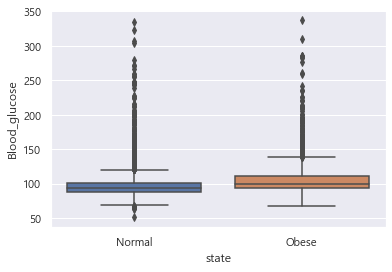

In [5]:
sns.boxplot(x= 'state',y='Blood_glucose',data = data)

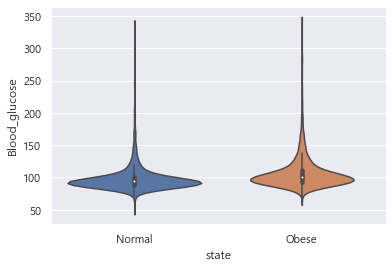

In [6]:
sns.violinplot(x= 'state',y='Blood_glucose',data = data)

### 1-3) Diabete 열을 추가해서 혈당값이 126 이상인 환자를 1로, 그렇지 않은 정상인을 0으로 기록하고, 정상 체중과 비만 체중 각각에서 당뇨병 환자의 비율을 구하시오.

In [11]:
data['Diabete']= np.where(data['Blood_glucose']>= 126,1,0)
data.Diabete

0       0
1       1
2       1
3       0
4       0
       ..
5963    0
5964    0
5965    0
5966    0
5967    0
Name: Diabete, Length: 5968, dtype: int32

In [12]:
data.groupby('state').Diabete.mean()

state
Normal    0.063366
Obese     0.130918
Name: Diabete, dtype: float64

In [7]:
data['Diabete'] = [ 1 if b >= 126 else 0 for b in data['Blood_glucose']]
data

,ID,sex,age,height,weight,waist,BMI,Blood_glucose,state,Diabete
0,A901020501,M,80,162.4,56.0,82.2,21.233226,103,Normal,0
1,A901021301,M,78,167.7,76.4,98.3,27.166096,127,Obese,1
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134,Normal,1
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99,Normal,0
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111,Obese,0
...,...,...,...,...,...,...,...,...,...,...
5963,R904028502,F,35,159.8,55.6,70.1,21.773149,90,Normal,0
5964,R904028503,F,66,156.9,63.9,87.3,25.957028,93,Obese,0
5965,R904028902,F,73,145.2,51.8,77.2,24.569512,99,Normal,0
5966,R904029201,M,43,176.8,84.1,99.2,26.904906,108,Obese,0


In [8]:
group = data.groupby("state")
group.mean()['Diabete']

state
Normal    0.063366
Obese     0.130918
Name: Diabete, dtype: float64

***

## 2. 연령별 비만 유병율 시각화
### 2-1) 20대, 30대, 40대, 50대, 60대, 70대로 그룹을 나누고, 각 연령별 BMI의 분포를 violinplot으로 비교하시오.
x축 레이블로 20대, 30대, 40대, 50대, 60대, 70대가 명시되도록 할 것. (힌트: violinplot에 order=[...] 옵션으로 순서 지정)

In [46]:
condition_list = [(data.age >=20) & (data.age<30), 
                  (data.age >=30) & (data.age<40), 
                  (data.age >=40) & (data.age<50), 
                  (data.age >=50) & (data.age<60),
                  (data.age >=60) & (data.age<70),
                  (data.age >=70) & (data.age<80)] 
choice_list = [ '20대', '30대', '40대','50대','60대','70대' ]
data['연령대'] = np.select(condition_list, choice_list, default = 'NaN')
data

,ID,sex,age,height,weight,waist,BMI,Blood_glucose,state,Diabete,연령대,ages
0,A901020501,M,80,162.4,56.0,82.2,21.233226,103,Normal,0,NaN,NaN
1,A901021301,M,78,167.7,76.4,98.3,27.166096,127,Obese,1,70대,70대
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134,Normal,1,70대,70대
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99,Normal,0,40대,40대
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111,Obese,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5963,R904028502,F,35,159.8,55.6,70.1,21.773149,90,Normal,0,30대,30대
5964,R904028503,F,66,156.9,63.9,87.3,25.957028,93,Obese,0,60대,60대
5965,R904028902,F,73,145.2,51.8,77.2,24.569512,99,Normal,0,70대,70대
5966,R904029201,M,43,176.8,84.1,99.2,26.904906,108,Obese,0,40대,40대


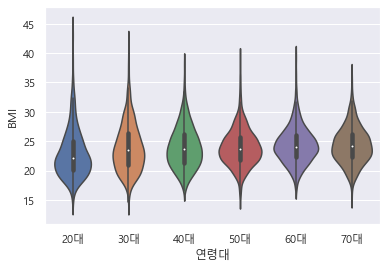

In [47]:
sns.violinplot(x='연령대',y='BMI',data=data,order = ['20대','30대','40대','50대','60대','70대'])

### 2-2) 각 연령대별로 비만(BMI 25~30), 고도비만(BMI >= 30)인 사람의 비율을 구하시오.
obs_ratio, obs2_ratio로 각각 저장할 것.

In [62]:
group2 = data.groupby('연령대')
total = group2.count()['BMI']
BMI2 = data[(data.BMI>=25) & (data.BMI<=30)]
group3 = BMI2.groupby('연령대')
ob = group3.count()['BMI']
obs_ratio = ob/total

In [64]:
BMI3 = data[data.BMI>=30]
group4 = BMI3.groupby('연령대')
ob2 = group4.count()['BMI']
obs2_ratio = ob2/total

In [65]:
print(obs_ratio,obs2_ratio)

연령대
20대    0.183824
30대    0.276331
40대    0.301172
50대    0.300344
60대    0.336150
70대    0.339028
NaN    0.272727
Name: BMI, dtype: float64 연령대
20대    0.069118
30대    0.078143
40대    0.056808
50대    0.035284
60대    0.044131
70대    0.049934
NaN    0.042208
Name: BMI, dtype: float64


### 2-3) 연령대별 비만, 고도비만의 비율을 누적 막대그래프로 그리시오.
고도비만(BMI >= 30)을 아래쪽에 먼저 그리고, 비만(BMI: 25~30)을 그 위에 쌓는 꼴로 그리시오. (아래 예시 참조)
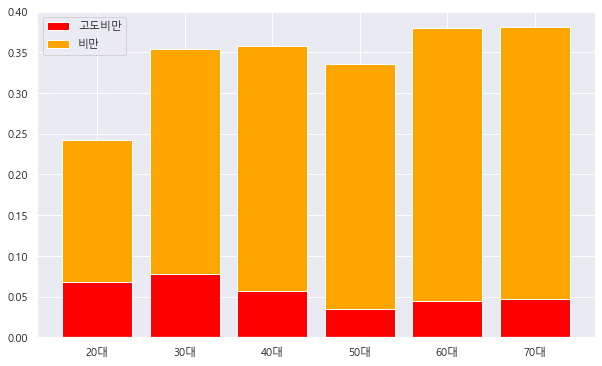

<BarContainer object of 7 artists>

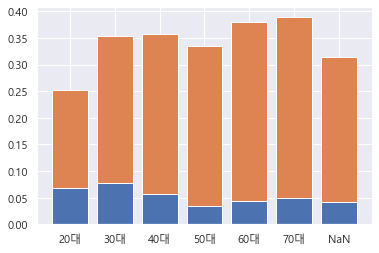

In [96]:
x= obs_ratio.index
plt.bar(x, height=obs2_ratio)
plt.bar(x,height=obs_ratio,bottom=obs2_ratio)


### 2-4) (보너스 문제) 남성/여성으로 나누어서 위 2-3) 그래프를 그리고 그 차이를 비교해보시오.

In [13]:
data[data.sex =='M']
obs_ratio_M = data[data.sex == 'M'].groupby('연령대').비만.mean()
obs2_ratio_M = data[data.sex =='M'].groupby('연령대').고도비만.mean()
print(obs_ratio_M,obs2_ratio_M)

KeyError: '연령대'